<div style="text-align: center; color: #007BFF; font-size: 36px; font-weight: bold;">
    Welcome to this Tutorial
</div>


# Parte1:les fonctionalite  

<h2 style="font-family: 'Arial', sans-serif; font-size: 22px; color: #00CD32;">data ingestion</h2>

Nous mettons en place un bot Telegram gratuit, facile et efficace, qui reçoit et enregistre des fichiers multimédias tout en permettant des échanges avec notre agent.

<h2 style="font-family: 'Arial', sans-serif; font-size: 22px; color: #00CD32;">Image Pre-Processing</h2>

Prétraitement de l'image avant l'extraction du texte avec le modèle OCR.
Cette étape consiste à améliorer la qualité de l'image en la convertissant en niveaux de gris, en ajustant le contraste,
et en appliquant d'autres transformations nécessaires (comme le redressement, le redimensionnement ou la suppression du bruit)
pour faciliter la reconnaissance optique des caractères (OCR) et obtenir des résultats plus précis.

<h4 style="color: purple;">
  1. Conversion en niveaux de gris
</h4>

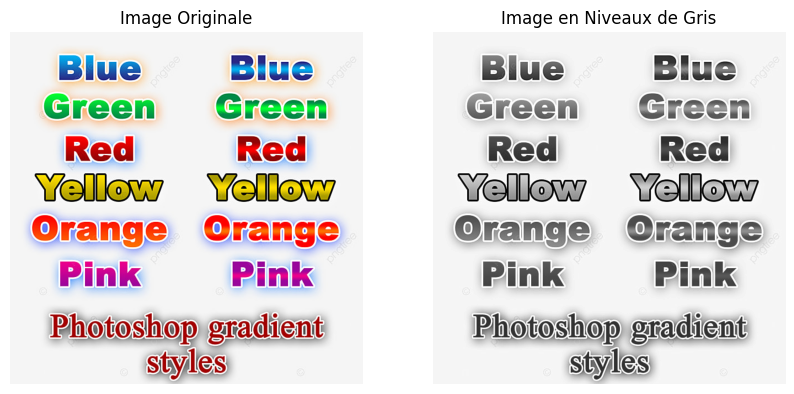

In [92]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread(r"C:\Users\dell\Desktop\BI_prototype\tutorial\text_with_c.jpg")
# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(10, 5))
# Afficher l'image originale
plt.subplot(1, 2, 1)  # (nrows, ncols, index)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir de BGR à RGB pour affichage
plt.title("Image Originale")
plt.axis('off')

# Afficher l'image en niveaux de gris
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')  # Affichage en niveaux de gris
plt.title("Image en Niveaux de Gris")
plt.axis('off')
# Afficher les deux images côte à côte
plt.show()

(par exemple, une image RGB) en une image en nuances de gris, où chaque pixel représente une intensité de gris allant du noir (0) au blanc (255).

<h4 style="color: purple;">
  2. Binarisation (Seuillage)
</h4>


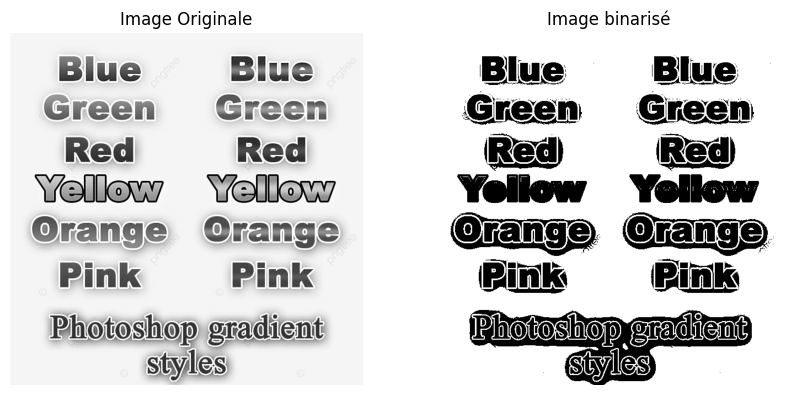

In [93]:
binary_image = cv2.threshold(gray_image, 220, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(10, 5))
# Afficher l'image originale
plt.subplot(1, 2, 1)  # (nrows, ncols, index)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))  # Convertir de BGR à RGB pour affichage
plt.title("Image Originale")
plt.axis('off')

# Afficher l'image en niveaux de gris
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')  # Affichage en niveaux de gris
plt.title("Image binarisé")
plt.axis('off')
# Afficher les deux images côte à côte
plt.show()

<h4 style="color: purple;">
  3. Élimination du bruit
</h4>

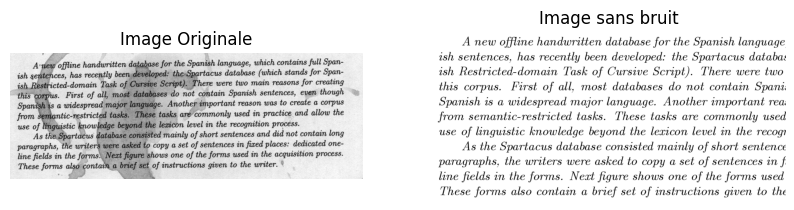

In [94]:
## denoised image est une resultat d'un model AI pre-entraine ,pas d'un traitement dans cette celluls de code 

denoised= cv2.imread(r"C:\Users\dell\Desktop\BI_prototype\tutorial\Fontfre_Clean_TE.png")
noised=cv2.imread(r"C:\Users\dell\Desktop\BI_prototype\tutorial\Fontfre_Noisec_RE.png")

plt.figure(figsize=(10, 5))
# Afficher l'image originale
plt.subplot(1, 2, 1)  # (nrows, ncols, index)
plt.imshow(cv2.cvtColor(noised, cv2.COLOR_BGR2RGB))  # Convertir de BGR à RGB pour affichage
plt.title("Image Originale")
plt.axis('off')

# Afficher l'image en niveaux de gris
plt.subplot(1, 2, 2)
plt.imshow(denoised, cmap='gray')  # Affichage en niveaux de gris
plt.title("Image sans bruit")
plt.axis('off')
# Afficher les deux images côte à côte
plt.show()

<h4 style="color: purple;">
  4. Redimensionnement
</h4>

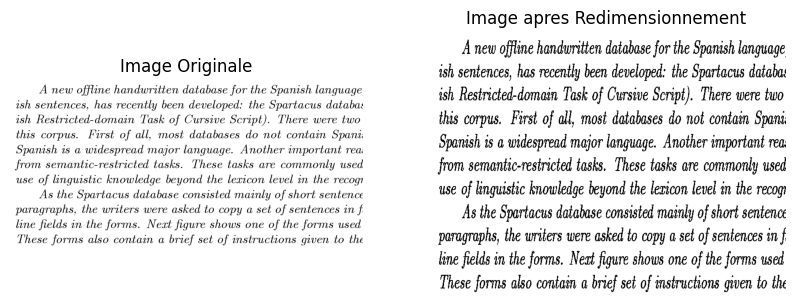

In [95]:
width = 800  # Largeur cible
height = 600  # Hauteur cible

resized_image = cv2.resize(denoised, (width, height), interpolation=cv2.INTER_CUBIC)
resized_image = cv2.threshold(resized_image, 220, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(10, 5))
# Afficher l'image originale
plt.subplot(1, 2, 1)  # (nrows, ncols, index)
plt.imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB))  # Convertir de BGR à RGB pour affichage
plt.title("Image Originale")
plt.axis('off')

# Afficher l'image en niveaux de gris
plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')  # Affichage en niveaux de gris
plt.title("Image apres Redimensionnement ")
plt.axis('off')
# Afficher les deux images côte à côte
plt.show()

<h4 style="color: purple;">
  5. Correction d'inclinaison (Deskewing)
</h4>

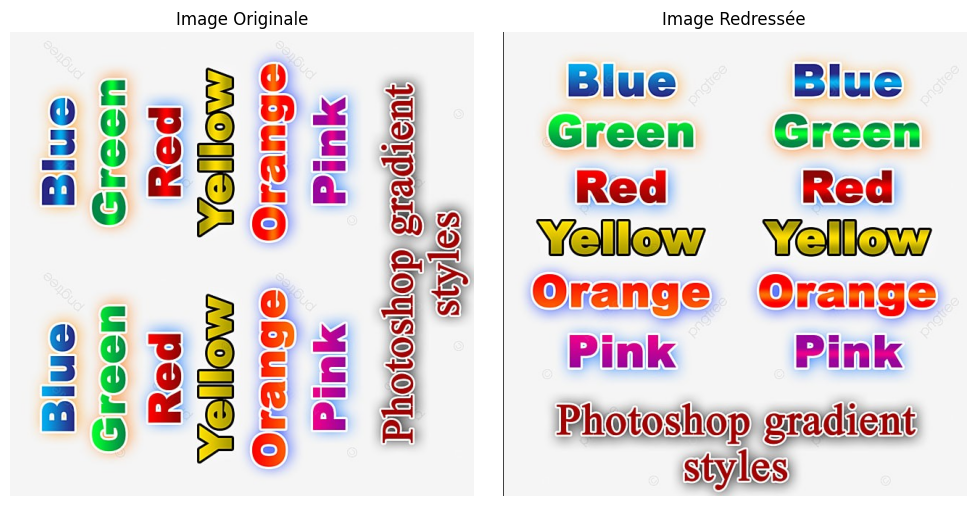

In [96]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Charger l'image
image_path = r"C:\Users\dell\Desktop\BI_prototype\tutorial\text_with_c - Copy.jpg"
binary_image = cv2.imread(image_path)

# Convertir en niveaux de gris
gray_image = cv2.cvtColor(binary_image, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage binaire (nécessaire pour `findNonZero`)
_, binary_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Trouver les coordonnées des pixels non nuls
coords = cv2.findNonZero(binary_thresh)

# Calculer l'angle de rotation
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
    angle = (90 + angle)
else:
    angle = -angle

# Calculer la matrice de rotation
(h, w) = binary_image.shape[:2]  # Dimensions de l'image
rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1)

# Effectuer la rotation pour redresser l'image
deskewed_image = cv2.warpAffine(binary_image, rotation_matrix, (w, h))

# Afficher les résultats
plt.figure(figsize=(10, 5))

# Afficher l'image originale
plt.subplot(1, 2, 1)  # (nrows, ncols, index)
plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB))  # Convertir de BGR à RGB pour affichage
plt.title("Image Originale")
plt.axis('off')

# Afficher l'image redressée
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(deskewed_image, cv2.COLOR_BGR2RGB))  # Affichage redressé
plt.title("Image Redressée")
plt.axis('off')

plt.tight_layout()
plt.show()


<h4 style="color: purple;">
  6. Amélioration du contraste
</h4>

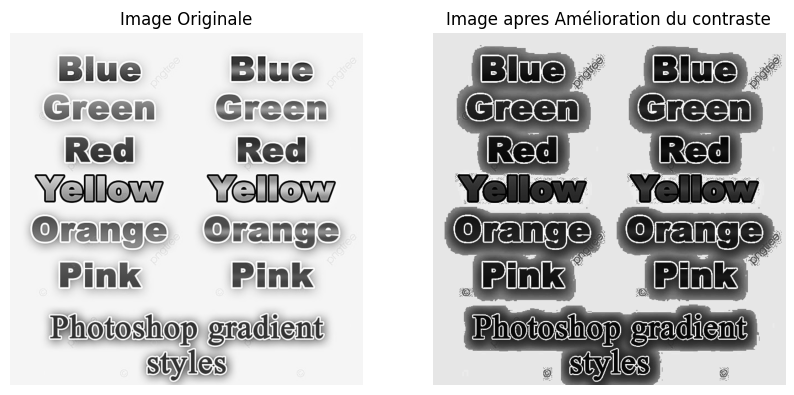

In [97]:
image=r"C:\Users\dell\Desktop\BI_prototype\tutorial\text_with_c.jpg"
image=cv2.imread(image)
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
enhanced_image = cv2.equalizeHist(image)
plt.figure(figsize=(10, 5))
# Afficher l'image originale
plt.subplot(1, 2, 1)  # (nrows, ncols, index)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir de BGR à RGB pour affichage
plt.title("Image Originale")
plt.axis('off')

# Afficher l'image en niveaux de gris
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')  # Affichage en niveaux de gris
plt.title("Image apres Amélioration du contraste")
plt.axis('off')
# Afficher les deux images côte à côte
plt.show()

<h2 style="font-family: 'Arial', sans-serif; font-size: 22px; color: #00CD32;">data extraction</h2>

<p><span style="color: green; font-weight: bold;">Pytesseract :</span> Utilisation de Tesseract OCR via la bibliothèque <code>pytesseract</code> pour extraire du texte à partir d'images, efficace pour les documents avec texte imprimé clair.</p>

<p><span style="color: blue; font-weight: bold;">EasyOCR :</span> Utilisation de la bibliothèque <code>EasyOCR</code> pour l'extraction de texte à partir d'images, idéale pour des documents avec des polices non standards ou de mauvaise qualité.</p>

<p><span style="color: red; font-weight: bold;">Extraction de texte à partir de PDF :</span> Utilisation de bibliothèques comme <code>PyPDF2</code> ou <code>pdfplumber</code> pour extraire le texte des fichiers PDF, notamment pour les factures ou rapports stockés sous ce format.</p>


In [98]:
#1. Pytesseract (pour extraire du texte à partir d'une image)
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# Charger l'image
image_path=r"C:\Users\dell\Desktop\BI_prototype\tutorial\purchasse.png"
image = Image.open(image_path)
# Extraire le texte à partir de l'image
text1 = pytesseract.image_to_string(image)

print("Texte extrait avec Pytesseract :")
print(text1)

Texte extrait avec Pytesseract :
@

Purchase Orders

Order ID Order Date Customer Name
10250 2016-07-08 Mario Pontes
Products
Product ID: Product: Quantity Unit Price:
41 Jack's New England Clam Chowder 10 77
51 Manjimup Dried Apples 35 42.4
65 Louisiana Fiery Hot Pepper Sauce 15 16.8




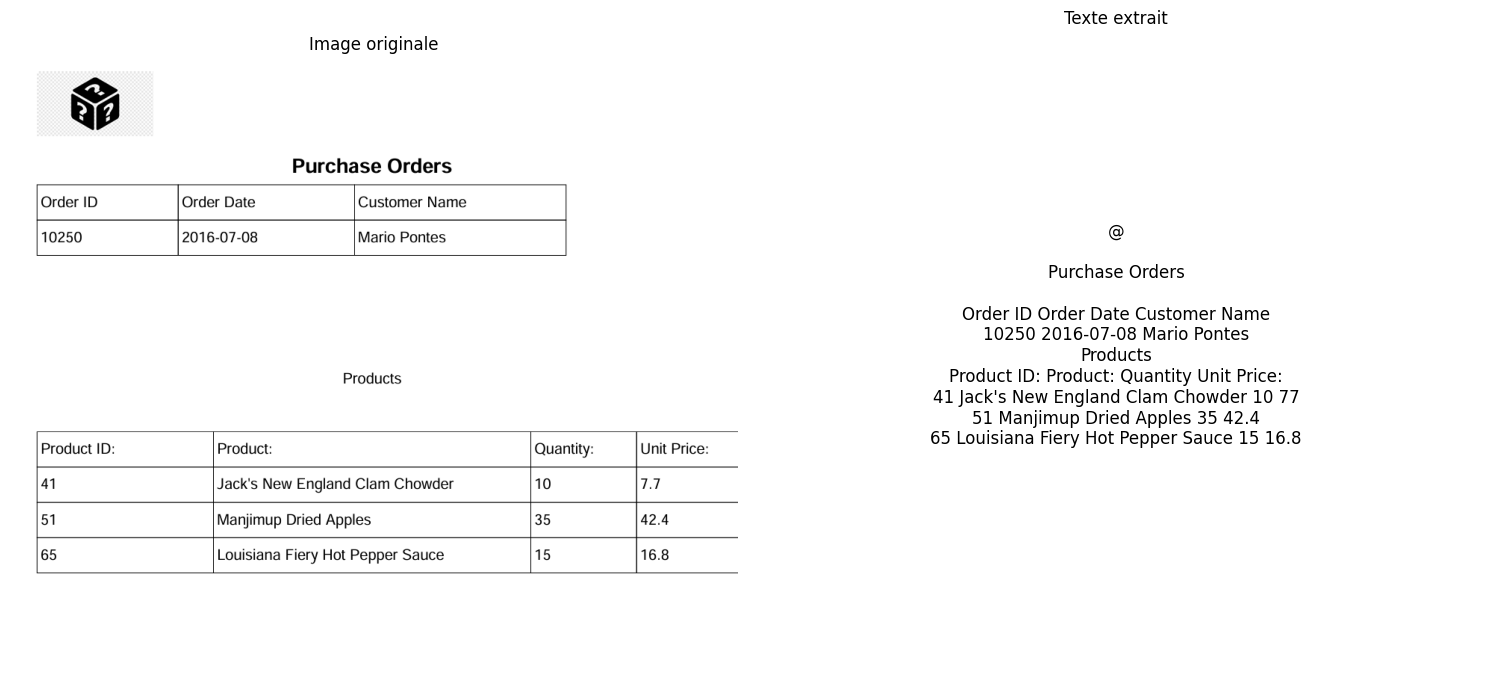

In [99]:
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

# Chemin vers Tesseract et l'image
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
image_path = r"C:\Users\dell\Desktop\BI_prototype\tutorial\purchasse.png"

# Charger l'image
image = Image.open(image_path)

# Extraire le texte à partir de l'image
text1 = pytesseract.image_to_string(image)

# Configuration de l'affichage
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Affichage de l'image à gauche
ax[0].imshow(image)
ax[0].axis("off")  # Pas d'axes
ax[0].set_title("Image originale")

# Affichage du texte extrait à droite
ax[1].text(0.5, 0.5, text1, fontsize=12, ha="center", va="center", wrap=True)
ax[1].axis("off")  # Pas d'axes
ax[1].set_title("Texte extrait")

# Ajuster les marges et afficher
plt.tight_layout()
plt.show()


In [100]:
#2. EasyOCR (pour extraire du texte à partir d'une image)
import easyocr
# Initialiser l'outil OCR
reader = easyocr.Reader(['en'])  # 'en' pour l'anglais

# Extraire le texte à partir de l'image
results = reader.readtext(image_path)

print("Texte extrait avec EasyOCR :")
text2=""" """
for result in results:
    print(result[1])  # Le texte extrait est dans le deuxième élément de la tupla
    text2+=result[1]

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Texte extrait avec EasyOCR :
Purchase Orders
Order ID
Order Date
Customer Name
10250
2016-07-08
Mario Pontes
Products
Product ID:
Product:
Quantity:
Unit Price:
41
Jack's New England Clam Chowder
10
7.7
51
Manjimup Dried Apples
35
42.4
65
Louisiana
Hot Pepper Sauce
15
16.8
Fiery


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


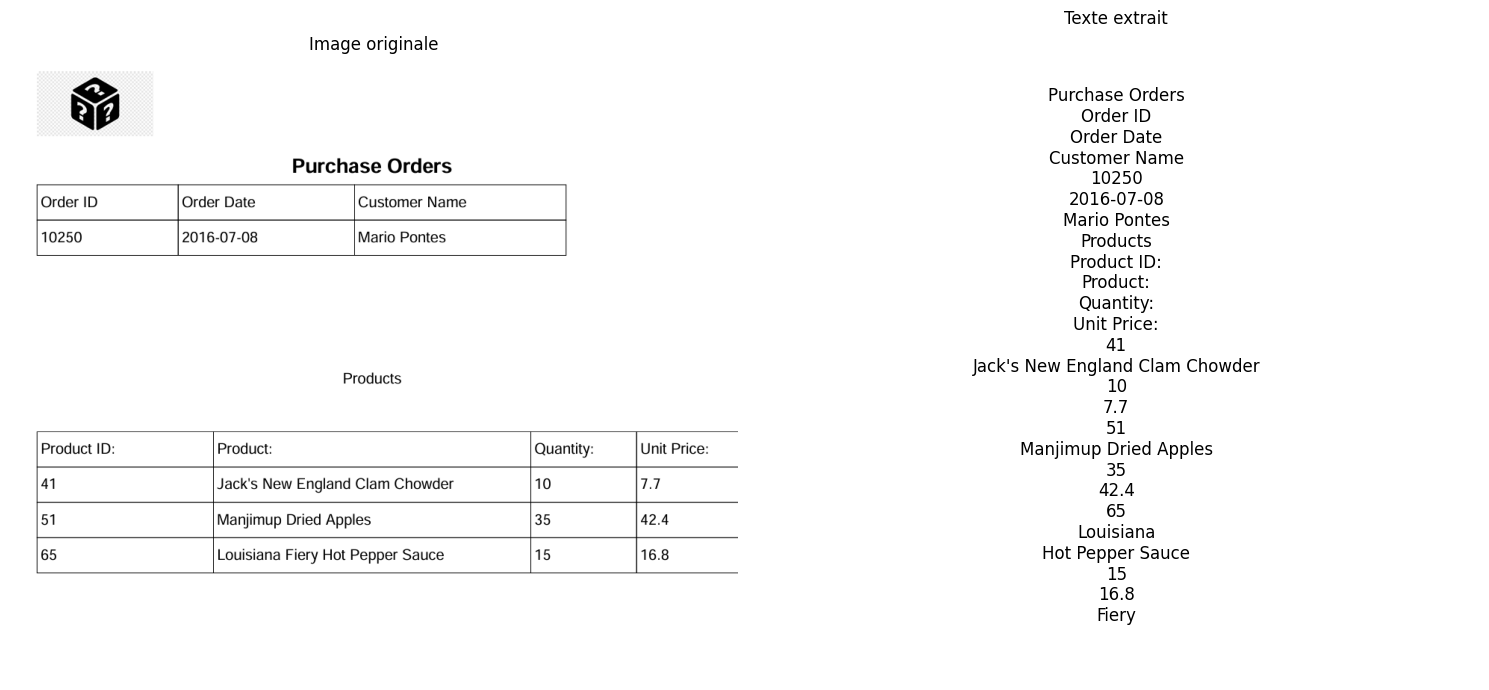

In [101]:
import easyocr
import matplotlib.pyplot as plt
from PIL import Image

# Chemin vers l'image
image_path=r"C:\Users\dell\Desktop\BI_prototype\tutorial\purchasse.png"

# Initialiser l'outil OCR
reader = easyocr.Reader(['en'])  # 'en' pour l'anglais

# Extraire le texte à partir de l'image
results = reader.readtext(image_path)

# Charger l'image avec PIL pour l'afficher
image = Image.open(image_path)

# Extraire le texte dans une seule chaîne
text2 = "\n".join([result[1] for result in results])

# Configuration de l'affichage
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Affichage de l'image à gauche
ax[0].imshow(image)
ax[0].axis("off")  # Pas d'axes
ax[0].set_title("Image originale")

# Affichage du texte extrait à droite
ax[1].text(0.5, 0.5, text2, fontsize=12, ha="center", va="center", wrap=True)
ax[1].axis("off")  # Pas d'axes
ax[1].set_title("Texte extrait")

# Ajuster les marges et afficher
plt.tight_layout()
plt.show()

In [102]:
#3. Extraction de texte à partir de PDF (en utilisant PyPDF2)
import PyPDF2
# Ouvrir le fichier PDF
pdf_path=r"C:\Users\dell\Desktop\BI_prototype\tutorial\invoice_10248.pdf"
with open(pdf_path, 'rb') as file:
    reader = PyPDF2.PdfReader(file)

    # Extraire le texte de chaque page
    text2 = ""
    for page in reader.pages:
        text2 += page.extract_text()

print("Texte extrait du PDF avec PyPDF2 :")
print(text2)


Texte extrait du PDF avec PyPDF2 :
Invoice
Order ID: 10248
Customer ID: VINET
Order Date: 2016-07-04
Customer Details:
Contact Name: Paul Henriot
Address: 59 rue de l'Abbaye
City: Reims
Postal Code: 51100
Country: France
Phone: 26.47.15.10
Fax: 26.47.15.11
Product Details:
Product ID Product Name Quantity Unit Price
11 Queso Cabrales 12 14.0
42 Singaporean Hokkien Fried Mee 10 9.8
72 Mozzarella di Giovanni 5 34.8
  TotalPrice 440.0
Page 1


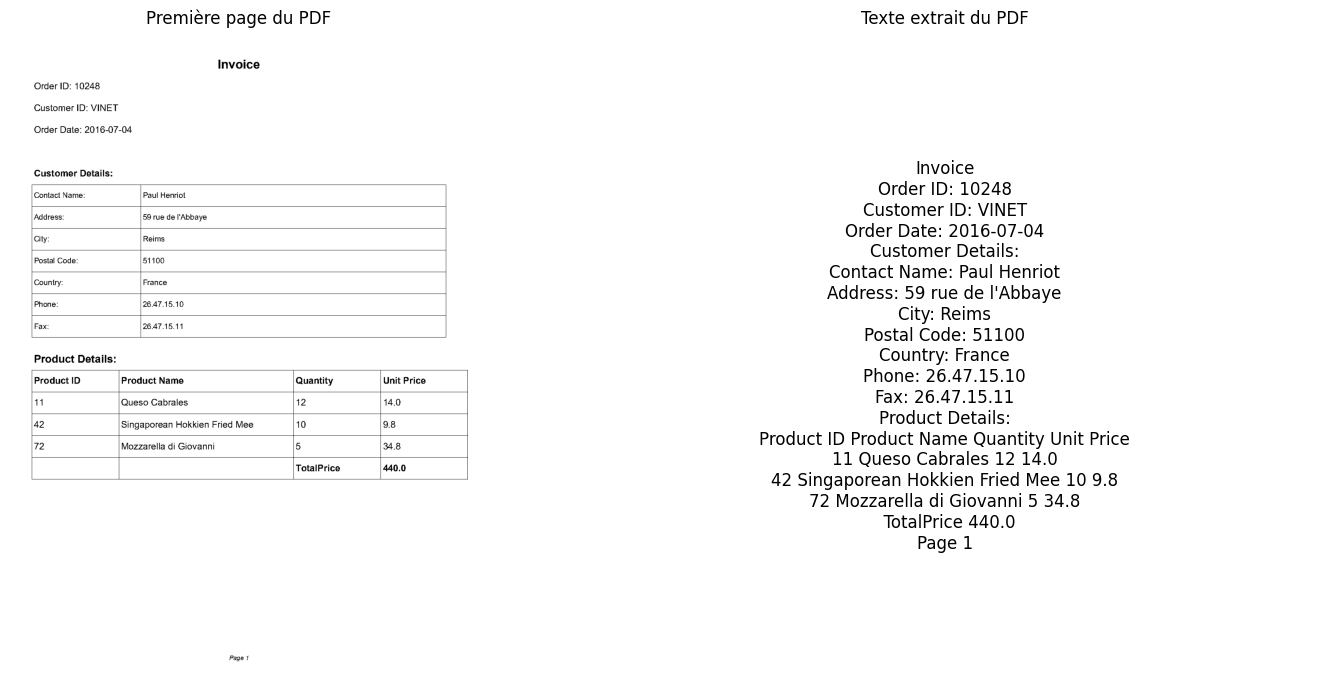

In [103]:
import PyPDF2
import pdfplumber
import matplotlib.pyplot as plt

# Chemin du fichier PDF
pdf_path = r"C:\Users\dell\Desktop\BI_prototype\tutorial\invoice_10248.pdf"

# Extraction du texte avec PyPDF2
with open(pdf_path, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    text2 = ""
    for page in reader.pages:
        text2 += page.extract_text()

# Extraction de l'image de la première page avec PDFplumber
with pdfplumber.open(pdf_path) as pdf:
    first_page = pdf.pages[0]
    image = first_page.to_image(resolution=150)  # Convertir la première page en image

# Configuration de l'affichage
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Affichage de l'image de la première page à gauche
ax[0].imshow(image.original)
ax[0].axis("off")  # Pas d'axes
ax[0].set_title("Première page du PDF")

# Affichage du texte extrait à droite
ax[1].text(0.5, 0.5, text2, fontsize=12, ha="center", va="center", wrap=True)
ax[1].axis("off")  # Pas d'axes
ax[1].set_title("Texte extrait du PDF")

# Ajuster les marges et afficher
plt.tight_layout()
plt.show()


In [104]:
#3. Extraction de texte à partir de PDF (en utilisant pdfplumber)
import pdfplumber
# Ouvrir le fichier PDF
pdf2_path=r"C:\Users\dell\Desktop\BI_prototype\tutorial\invoice_10257.pdf"
with pdfplumber.open(pdf2_path) as pdf:
    # Extraire le texte de la première page
    page = pdf.pages[0]
    text3 = page.extract_text()

print("Texte extrait du PDF avec pdfplumber :")
print(text3)

Texte extrait du PDF avec pdfplumber :
Invoice
Order ID: 10257
Customer ID: HILAA
Order Date: 2016-07-16
Customer Details:
Contact Name: Carlos Hernández
Address: Carrera 22 con Ave. Carlos Soublette #8-35
City: San Cristóbal
Postal Code: 5022
Country: Venezuela
Phone: (5) 555-1340
Fax: (5) 555-1948
Product Details:
Product ID Product Name Quantity Unit Price
27 Schoggi Schokolade 25 35.1
39 Chartreuse verte 6 14.4
77 Original Frankfurter grüne Soße 15 10.4
TotalPrice 1119.9
Page 1


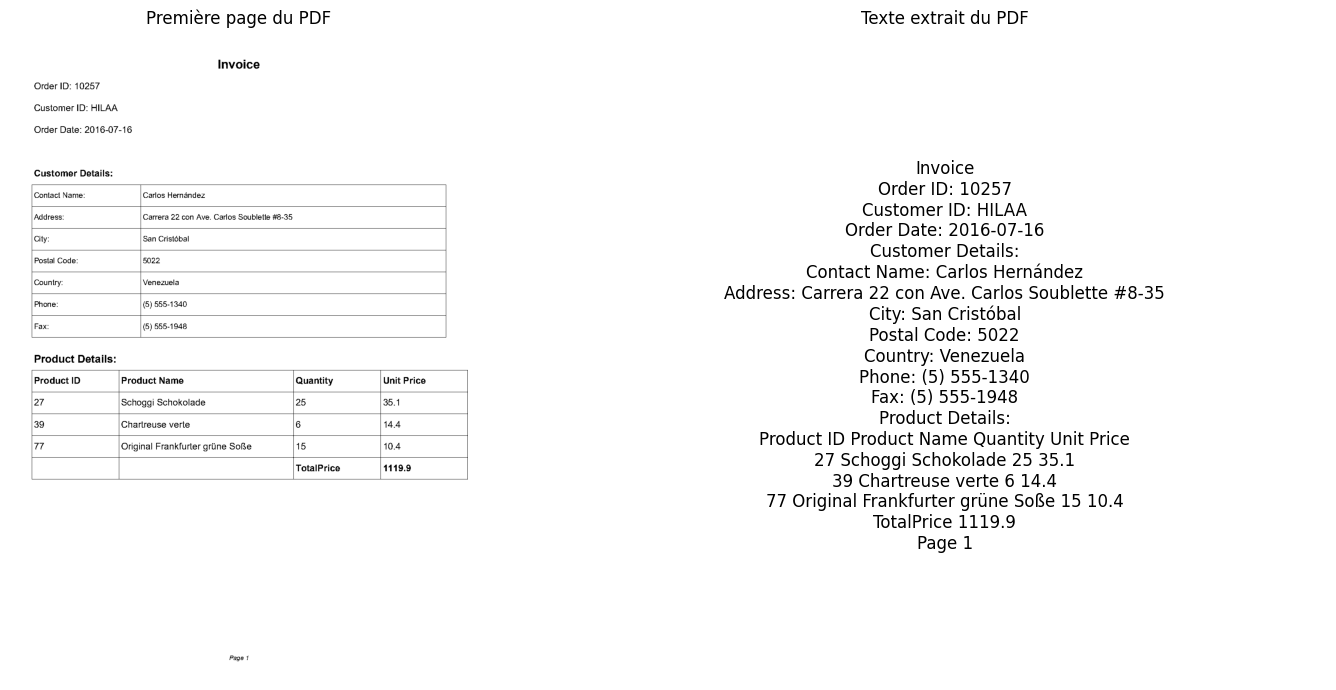

In [105]:
import pdfplumber
import matplotlib.pyplot as plt

# Chemin du fichier PDF
pdf2_path = r"C:\Users\dell\Desktop\BI_prototype\tutorial\invoice_10257.pdf"

# Extraction du texte et de l'image de la première page
with pdfplumber.open(pdf2_path) as pdf:
    # Extraction de la première page
    page = pdf.pages[0]
    text3 = page.extract_text()  # Extraction du texte
    image = page.to_image(resolution=150)  # Conversion en image

# Affichage avec Matplotlib
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Afficher l'image de la première page
ax[0].imshow(image.original)
ax[0].axis("off")  # Pas d'axes
ax[0].set_title("Première page du PDF")

# Afficher le texte extrait
ax[1].text(0.5, 0.5, text3, fontsize=12, ha="center", va="center", wrap=True)
ax[1].axis("off")  # Pas d'axes
ax[1].set_title("Texte extrait du PDF")

# Ajuster les marges et afficher
plt.tight_layout()
plt.show()


<h2 style="font-family: 'Arial', sans-serif; font-size: 22px; color: #00CD32;">data transformation</h2>

<span style="color:#8A2BE2;">Transformations par modèle NLP</span>: Utilisation de modèles de traitement du langage naturel pour normaliser, extraire, et transformer le texte en informations structurées, permettant de mieux comprendre le contenu des documents.

<span style="color:#8A2BE2;">Transformations par expressions régulières (Regex)</span>: Application d'expressions régulières pour nettoyer, valider, et structurer les données extraites en supprimant les informations inutiles et en formatant correctement les résultats.

In [106]:
from nlp import parse_invoice_data
processed_text1=parse_invoice_data(text3)
processed_text1

{'Order ID': '10257',
 'Customer ID': 'HILAA',
 'Order Date': '2016-07-16',
 'Customer Details': {'Contact Name': 'Carlos Hernández',
  'Address': 'Carrera 22 con Ave. Carlos Soublette #8-35',
  'City': 'San Cristóbal',
  'Postal Code': '5022',
  'Country': 'Venezuela',
  'Phone': '(5) 555-1340',
  'Fax': '(5) 555-1948'},
 'Products': [{'Product ID': '27',
   'Product Name': 'Schoggi Schokolade',
   'Quantity': 25,
   'Unit Price': 35.1},
  {'Product ID': '39',
   'Product Name': 'Chartreuse verte',
   'Quantity': 6,
   'Unit Price': 14.4},
  {'Product ID': '77',
   'Product Name': 'Original Frankfurter grüne Soße',
   'Quantity': 15,
   'Unit Price': 10.4}],
 'Total Price': 1119.9}

In [107]:
from nlp import parse_invoice_data_with_nlp
processed_text2=parse_invoice_data_with_nlp(text3)
processed_text2

{'Order ID': '10257',
 'Customer ID': 'HILAA',
 'Order Date': '2016-07-16',
 'Customer Details': {'Contact Name': 'Carlos Hernández\nAddress: Carrera 22 con Ave.',
  'Carlos Soublette #8-35\nCity': 'San Cristóbal\nPostal Code: 5022\nCountry: Venezuela\nPhone: (5) 555-1340\nFax: (5) 555-1948'},
 'Products': [{'Product ID': '27',
   'Product Name': 'Schoggi Schokolade',
   'Quantity': 25,
   'Unit Price': 35.1},
  {'Product ID': '39',
   'Product Name': 'Chartreuse verte',
   'Quantity': 6,
   'Unit Price': 14.4},
  {'Product ID': '77',
   'Product Name': 'Original Frankfurter grüne Soße',
   'Quantity': 15,
   'Unit Price': 10.4}],
 'Total Price': 1119.9}

In [108]:
import spacy
import re

# Charger le modèle spaCy
nlp = spacy.load("fr_core_news_sm")

def extract_invoice_data(text):
    # Appliquer le NLP spaCy pour analyser le texte
    doc = nlp(text)

    # Extraire les données principales avec des expressions régulières
    order_id = re.search(r"Order ID:\s*(\d+)", text).group(1)
    customer_id = re.search(r"Customer ID:\s*(\w+)", text).group(1)
    order_date = re.search(r"Order Date:\s*([\d-]+)", text).group(1)

    # Extraire les détails du client (en utilisant NER de spaCy)
    customer_details = {}
    customer_details["Contact Name"] = None
    customer_details["Address"] = None
    customer_details["City"] = None
    customer_details["Postal Code"] = None
    customer_details["Country"] = None
    customer_details["Phone"] = None
    customer_details["Fax"] = None

    for ent in doc.ents:
        if ent.label_ == "PERSON" and customer_details["Contact Name"] is None:
            customer_details["Contact Name"] = ent.text
        elif ent.label_ == "GPE" and customer_details["City"] is None:
            customer_details["City"] = ent.text
        elif ent.label_ == "MONEY" and customer_details["Postal Code"] is None:
            customer_details["Postal Code"] = ent.text
        elif ent.label_ == "LOC" and customer_details["Country"] is None:
            customer_details["Country"] = ent.text
        elif "phone" in ent.text.lower() and customer_details["Phone"] is None:
            customer_details["Phone"] = ent.text
        elif "fax" in ent.text.lower() and customer_details["Fax"] is None:
            customer_details["Fax"] = ent.text

    # Extraire les produits
    products_section = re.search(r"Product Details:(.*?)TotalPrice", text, re.DOTALL).group(1)
    product_lines = products_section.strip().split("\n")[1:]  # Ignorer la ligne d'en-tête
    products = []
    for line in product_lines:
        match = re.match(r"(\d+)\s+(.*?)\s+(\d+)\s+([\d.]+)", line)
        if match:
            products.append({
                "Product ID": match.group(1),
                "Product Name": match.group(2).strip(),
                "Quantity": int(match.group(3)),
                "Unit Price": float(match.group(4)),
            })

    # Extraire le prix total
    total_price = float(re.search(r"TotalPrice\s*([\d.]+)", text).group(1))

    # Construire le dictionnaire final
    invoice_data = {
        "Order ID": order_id,
        "Customer ID": customer_id,
        "Order Date": order_date,
        "Customer Details": customer_details,
        "Products": products,
        "Total Price": total_price
    }

    return invoice_data

# Exemple de texte de facture
invoice_text = """
Invoice
Order ID: 10257
Customer ID: HILAA
Order Date: 2016-07-16
Customer Details:
Contact Name: Carlos Hernández
Address: Carrera 22 con Ave. Carlos Soublette #8-35
City: San Cristóbal
Postal Code: 5022
Country: Venezuela
Phone: (5) 555-1340
Fax: (5) 555-1948
Product Details:
Product ID Product Name Quantity Unit Price
27 Schoggi Schokolade 25 35.1
39 Chartreuse verte 6 14.4
77 Original Frankfurter grüne Soße 15 10.4
TotalPrice 1119.9
"""

# Appeler la fonction et afficher les résultats
invoice_data = extract_invoice_data(invoice_text)
print(invoice_data)

{'Order ID': '10257', 'Customer ID': 'HILAA', 'Order Date': '2016-07-16', 'Customer Details': {'Contact Name': None, 'Address': None, 'City': None, 'Postal Code': None, 'Country': 'San Cristóbal\nPostal', 'Phone': 'Venezuela\nPhone', 'Fax': 'Fax'}, 'Products': [{'Product ID': '27', 'Product Name': 'Schoggi Schokolade', 'Quantity': 25, 'Unit Price': 35.1}, {'Product ID': '39', 'Product Name': 'Chartreuse verte', 'Quantity': 6, 'Unit Price': 14.4}, {'Product ID': '77', 'Product Name': 'Original Frankfurter grüne Soße', 'Quantity': 15, 'Unit Price': 10.4}], 'Total Price': 1119.9}


<h2 style="font-family: 'Arial', sans-serif; font-size: 22px; color: #00CD32;">data loading</h2>

<span style="color:#8A2BE2;">Chargement des données dans un Data Warehouse</span>: Les données transformées sont ensuite stockées dans un **Data Warehouse** pour des analyses efficaces. Les Data Warehouses centralisent les données provenant de différentes sources, facilitant ainsi l'analyse et la prise de décision.

Exemples de **Data Warehouses** :

- <span style="color:#8A2BE2;">Amazon Redshift</span>
- <span style="color:#8A2BE2;">Google BigQuery</span>
- <span style="color:#8A2BE2;">Snowflake</span>
- <span style="color:#8A2BE2;">Apache Hive</span>: Utilisé pour le traitement de données volumineuses dans un environnement Hadoop.

SQL est souvent utilisé pour interroger et charger des données dans le Data Warehouse, permettant des analyses rapides et efficaces.

In [109]:
from save import save_invoice_to_excel
output_path=r"C:\Users\dell\Desktop\BI_prototype\invoice_data.xlsx"
save_invoice_to_excel(processed_text1, output_path)

Les données ont été enregistrées avec succès dans C:\Users\dell\Desktop\BI_prototype\invoice_data.xlsx.


<h2 style="font-family: 'Arial', sans-serif; font-size: 22px; color: #00CD32;">data visualization</h2>

<h4 style="color: #800080;">Visualisation des données :</h4>
Utilisation d'une application interactive pour afficher et analyser les données traitées, permettant aux utilisateurs de consulter des graphiques, rapports et tendances à partir du Data Warehouse.

<h4 style="color: #1E90FF;">Outils de visualisation :</h4>
Intégration de bibliothèques comme <span style="color: #ff6347;">Plotly</span>, <span style="color: #32cd32;">Tableau</span> ou <span style="color: #ff8c00;">Power BI</span> pour créer des visualisations dynamiques et interactives, offrant des vues détaillées et des filtres personnalisables.

<h3 style="color:#FF7F50; font-family: 'Arial', sans-serif; text-align: center; text-decoration: underline;">
  Now, let's put all together to create a complete process.
</h3>

# Parte2:simulation d'un solutions BI

<h2 style="font-family: 'Arial', sans-serif; font-size: 22px; color: #00CD32;">Le scénario</h2>

Nous sommes une entreprise spécialisée dans la vente de bons d'achat, avec 100 points de vente à travers le Maroc. Chaque point de vente génère des factures par un petit système local et les envoie à notre système central via un bot Telegram, connecté à l'App1 qui ingère les documents en utilisant des requêtes CRUD. Les factures sont ensuite stockées temporairement.

Une seconde application (App2) effectue un processus ETL, utilisant un modèle OCR pour extraire le texte, et des modèles NLP ainsi que des expressions régulières pour transformer et structurer les données.

Enfin, les données traitées sont stockées dans un data warehouse et visualisées à travers une troisième application (App3), permettant leur consultation via un tableau de bord interactif.

![Description de l'image](arch.png)